# Heart Disease Analysis

In [17]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
import xgboost as xgb

Importing the data

In [18]:
df = pd.read_csv('heart_2020_cleaned.csv')
print(df.head(2))

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  


Analysing the data

In [19]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [20]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

C:\Users\nikhi\AppData\Local\Temp\ipykernel_31560\1715463398.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],kde=True)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_31560\1715463398.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],kde=True)
C:\Users\nikhi\AppData\Loc

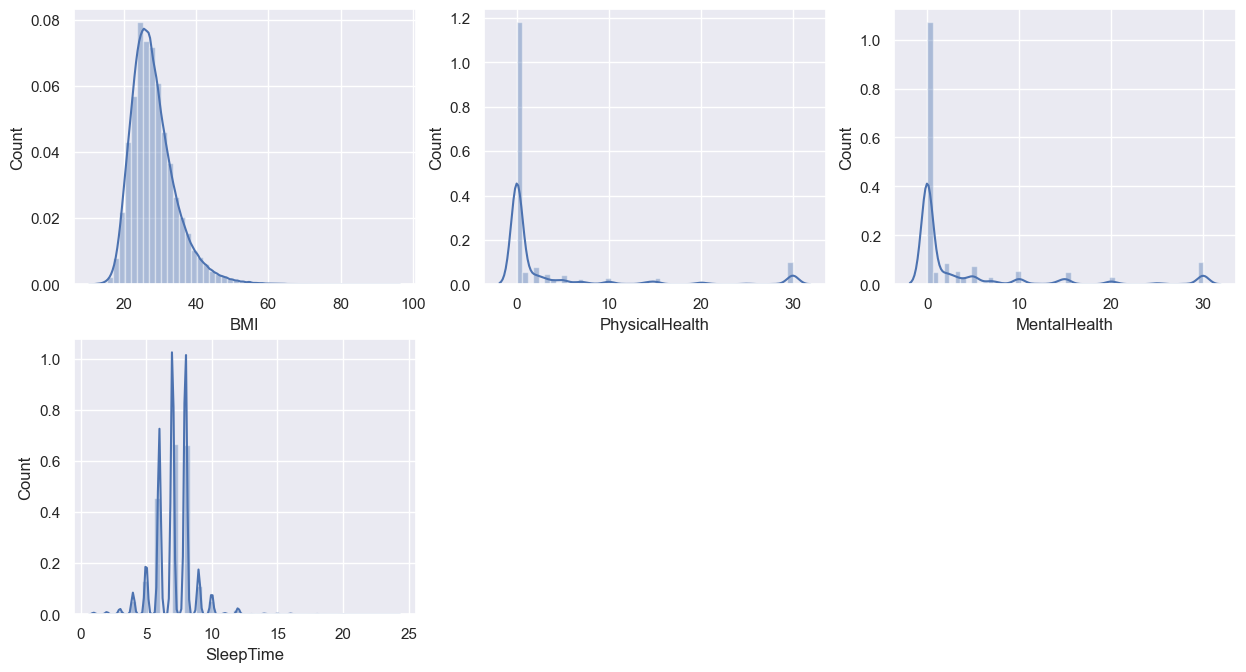

In [22]:
warnings.simplefilter(action='ignore', category=FutureWarning)
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

i=1
plt.figure(figsize = (15,25))
for feature in numeric_features.columns:
    plt.subplot(6,3,i)
    sns.distplot(df[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    i+=1

C:\Users\nikhi\AppData\Local\Temp\ipykernel_31560\887051403.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object])


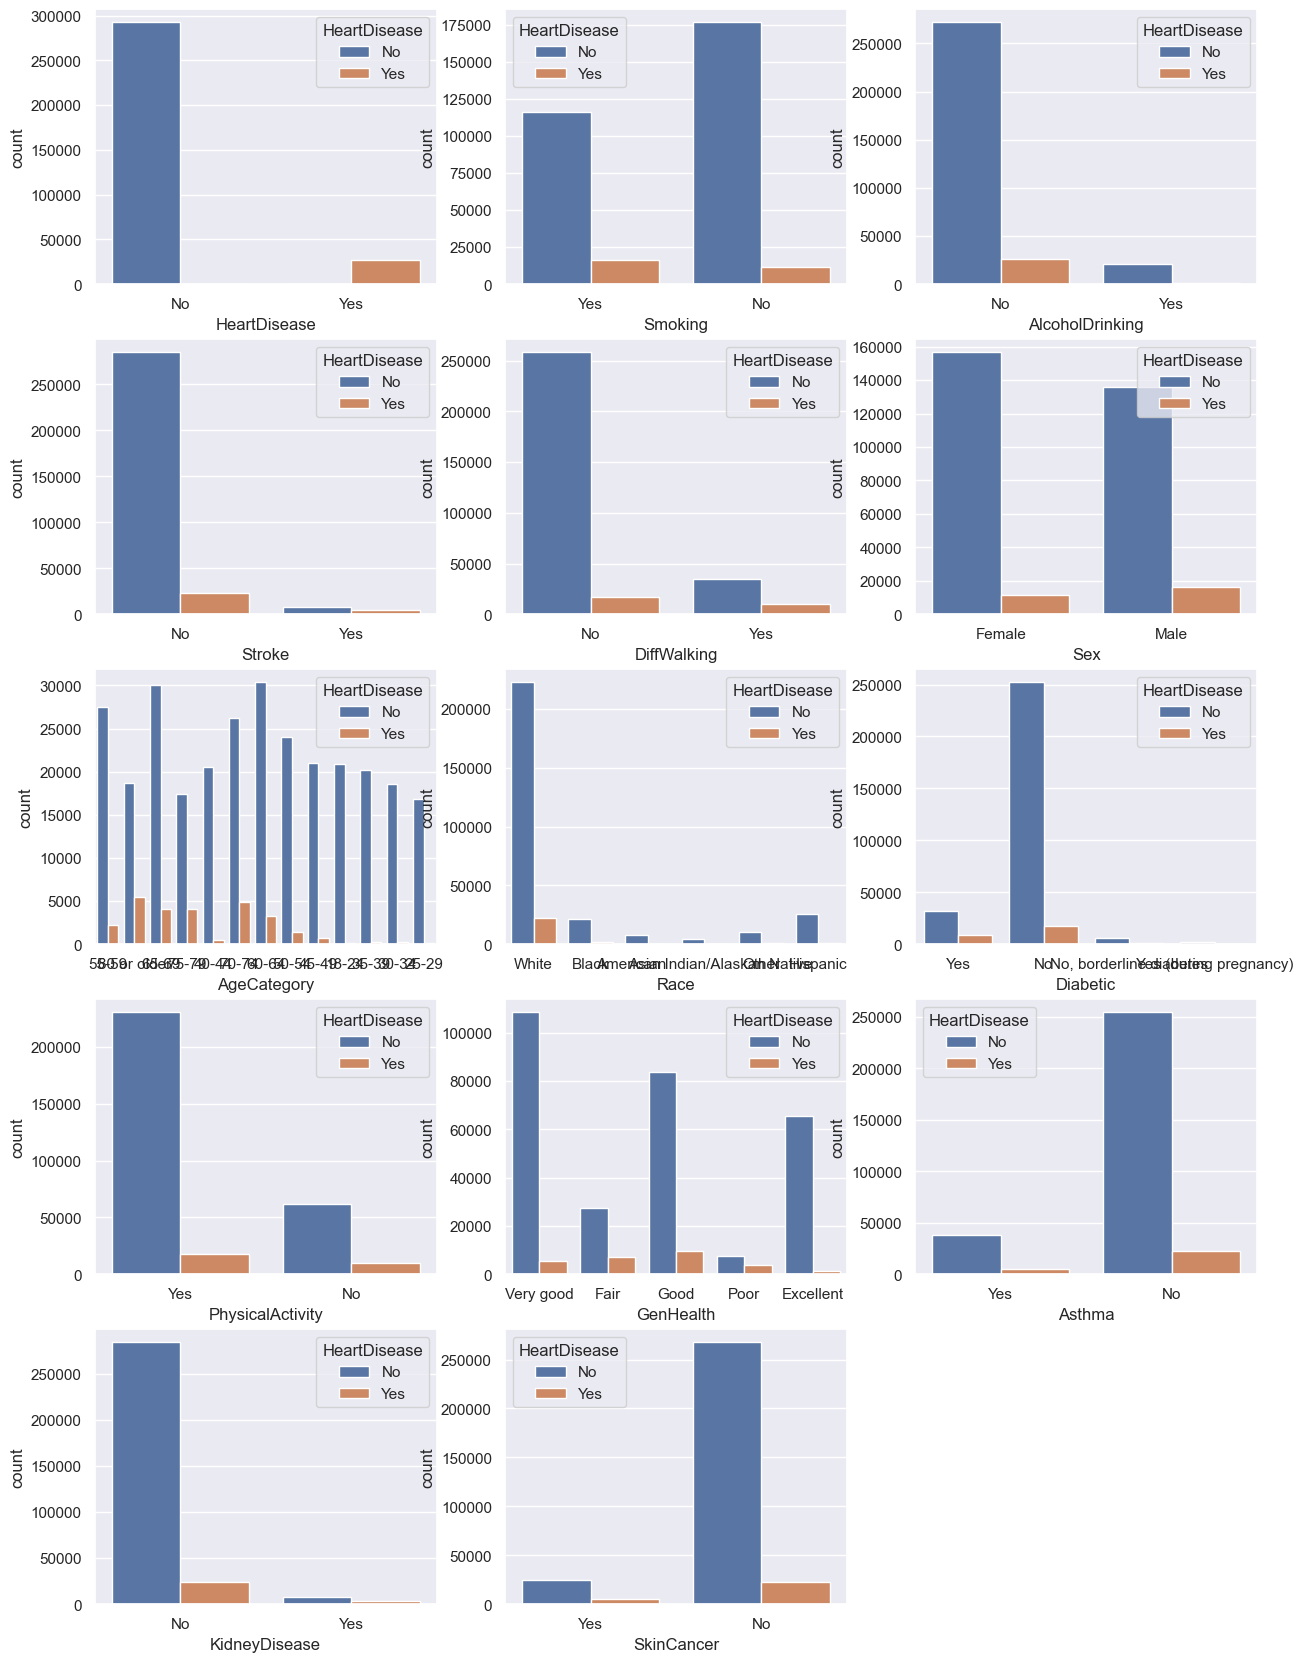

In [23]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

i = 1
plt.figure(figsize = (15,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature, hue = 'HeartDisease' , data = df)
    i +=1

<AxesSubplot: xlabel='Sex', ylabel='Count'>

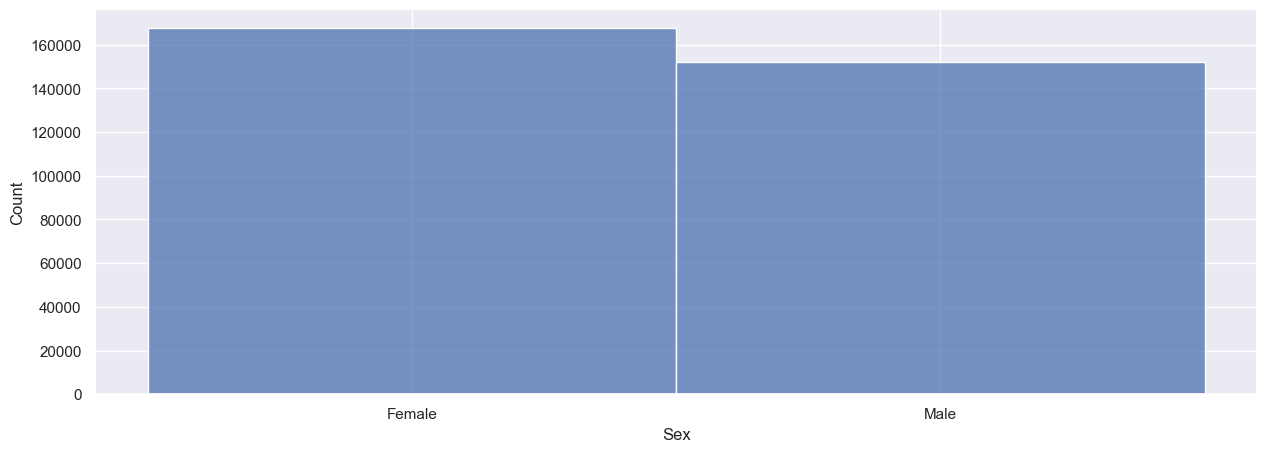

In [24]:
sns.histplot(x='Sex',  data =df)

<AxesSubplot: >

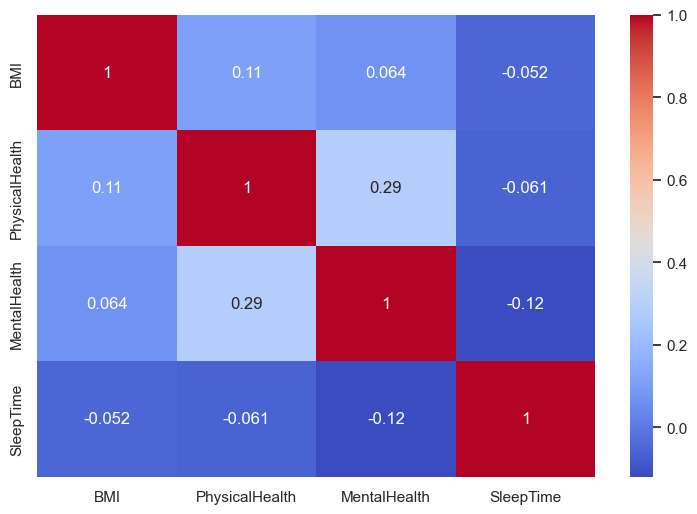

In [25]:
plt.figure(figsize=(9,6))
# plotting the graph
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<AxesSubplot: xlabel='Race', ylabel='Count'>

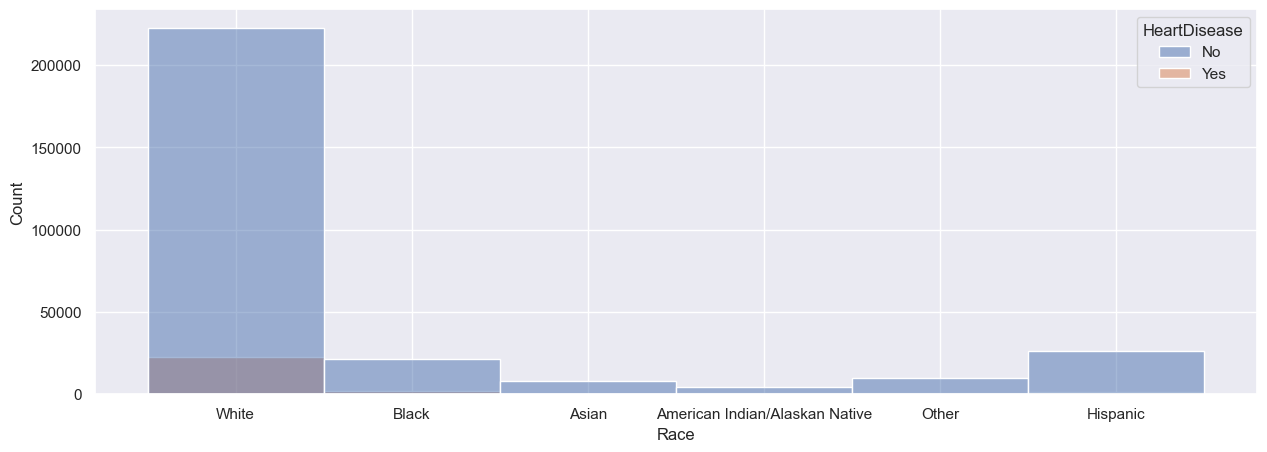

In [26]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.histplot(x = 'Race', hue = 'HeartDisease', data =df)

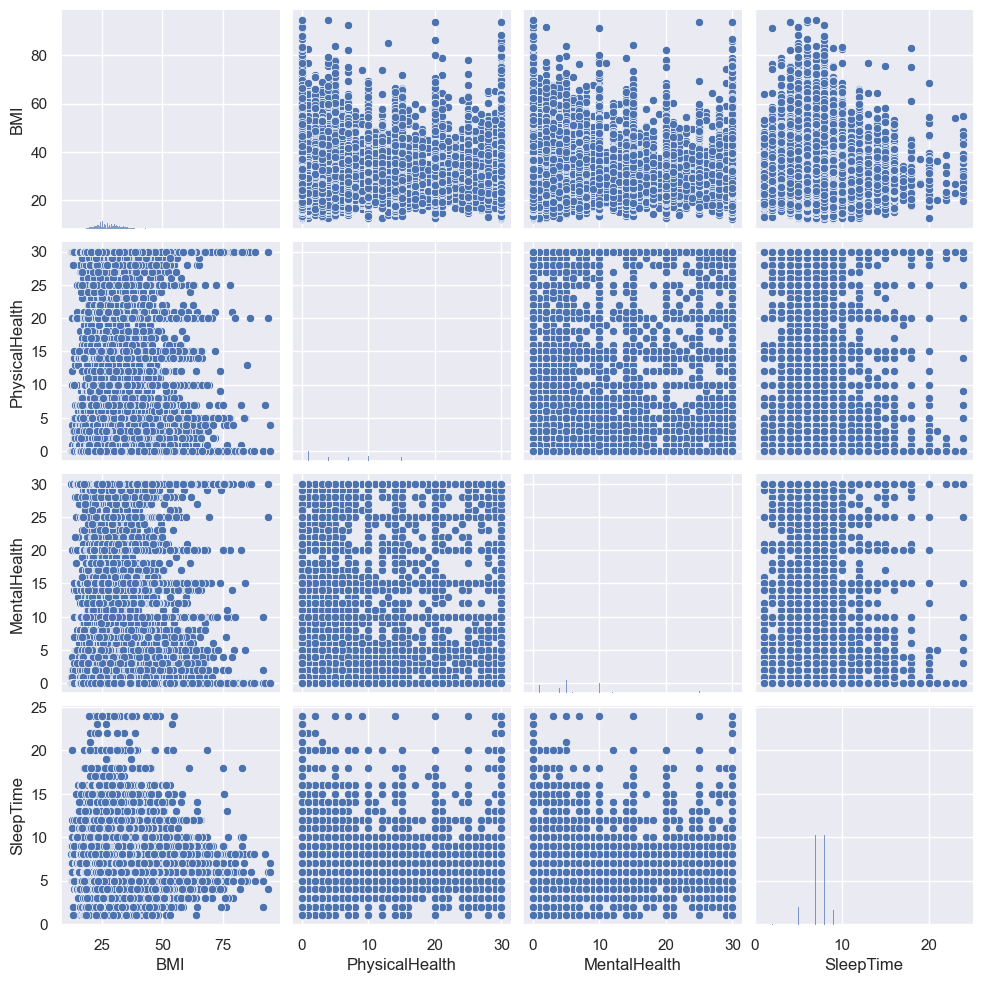

In [27]:
sns.pairplot(df)

# Data Preprocessing

In [28]:
# Converting the Age category range into mean values
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

In [29]:
# Converting Categorical Data into integers for classification
lst  = ['Smoking', 'Race', 'AlcoholDrinking', 'Stroke', 
        'DiffWalking','Diabetic', 'Sex', 'Asthma',
        'KidneyDisease', 'SkinCancer','PhysicalActivity',
        'GenHealth', 'HeartDisease']

def preprocess(a):
    dummy = pd.get_dummies(df[a])
    dummy = dummy.iloc[:,:-1]   # To avoid Dummy variable trap
    return dummy

Final = df.iloc[:,:]
for i in lst:
    temp = []
    temp = preprocess(i)
    Final = pd.concat([Final, temp], axis = 'columns')
    Final = Final.drop([i], axis = 'columns')
    if 'Yes' in Final.columns:
        Final.rename(columns = {'Yes': i}, inplace = True)
    if 'No' in Final.columns:
        Final.rename(columns = {'No': i}, inplace = True)

# Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
Final[['BMI','AgeCategory', 'PhysicalHealth','MentalHealth','SleepTime']] = sc_x.fit_transform(Final[['BMI','AgeCategory', 'PhysicalHealth','MentalHealth','SleepTime']])
print(Final.head(2))

        BMI  PhysicalHealth  MentalHealth  AgeCategory  SleepTime  Smoking  \
0 -1.844750       -0.046751      3.281069     0.149220  -1.460354        0   
1 -1.256338       -0.424070     -0.490039     1.447159  -0.067601        1   

   American Indian/Alaskan Native  Asian  Black  Hispanic  ...  Female  \
0                               0      0      0         0  ...       1   
1                               0      0      0         0  ...       1   

   Asthma  KidneyDisease  SkinCancer  PhysicalActivity  Excellent  Fair  Good  \
0       0              1           0                 0          0     0     0   
1       1              1           1                 0          0     0     0   

   Poor  HeartDisease  
0     0             1  
1     0             1  

[2 rows x 27 columns]


# Splitting the Data for testing and training

In [31]:
x = Final.iloc[:,0:-1].values
y = Final.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 1)


27373 292422


Text(0.5, 1.0, 'Imbalanced Data')

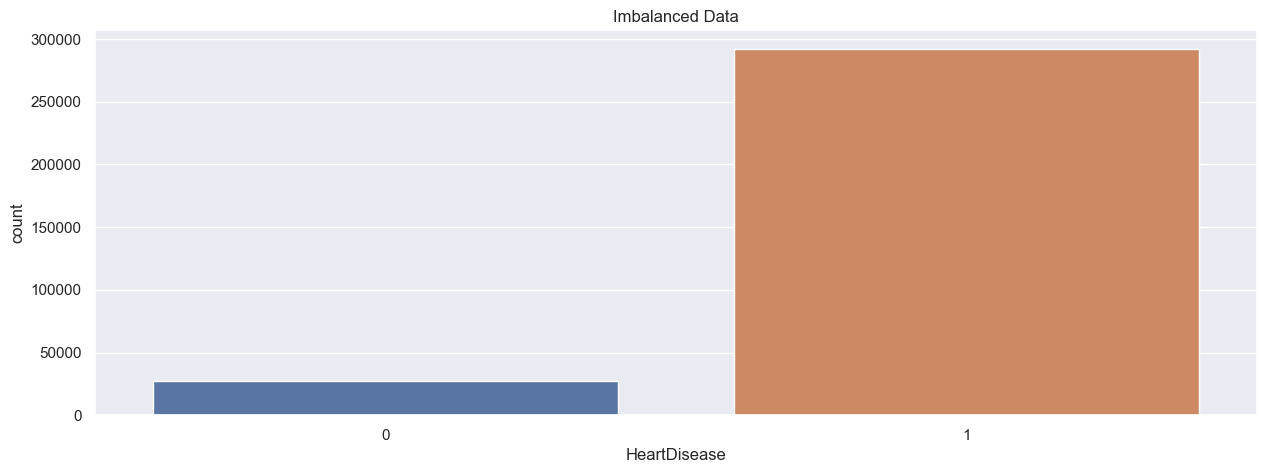

In [32]:
# Visualizing the unbalance

major = len(Final[Final['HeartDisease']==1])
minor = len(Final[Final['HeartDisease']==0])
print(minor, major)

ub = sns.countplot(x = 'HeartDisease', data = Final)
ub.set_title('Imbalanced Data')

# Implementing Random Undersampling

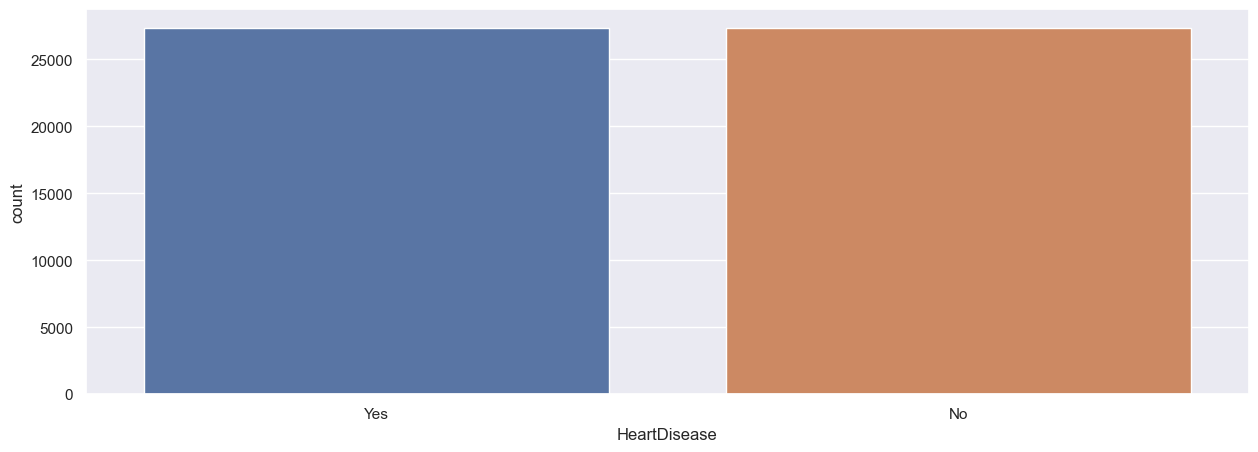

In [33]:
major_idx = Final[Final['HeartDisease']==1].index
minor_idx = Final[Final['HeartDisease']==0].index
# Getting random sample of size of Minor class from Mjor class indices
rand_mjr_idx = np.random.choice(major_idx,minor,replace = False)

Under_sampled_idx = np.concatenate([rand_mjr_idx,minor_idx])

# Visualizing the Balanced classes
u_data = Final.loc[Under_sampled_idx]
plott = sns.countplot(x = u_data['HeartDisease'], data = u_data)
plott.set(xticklabels= ['Yes', 'No'])

ux = u_data.iloc[:,0:-1].values
uy = u_data.iloc[:,-1].values

# Data Split
from sklearn.model_selection import train_test_split
ux_train, ux_test, uy_train, uy_test = train_test_split(ux,uy, test_size= 0.2, random_state= 1)


# Implementing Synthetic Minority Oversampling

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

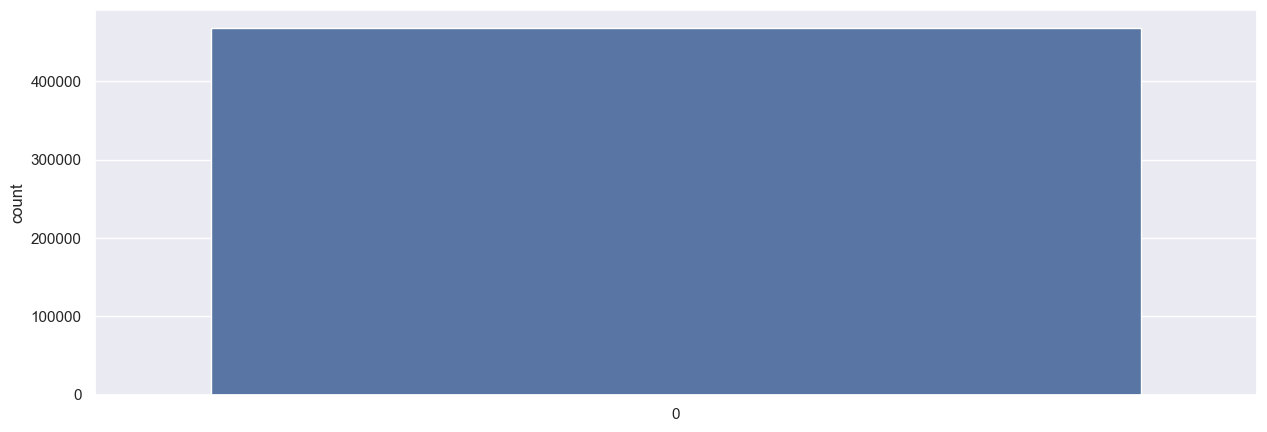

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
sm_t = SMOTE(random_state = 2)
X_test_res, y_test_res = sm_t.fit_resample(X_test,y_test.ravel())
smote = sns.countplot(y_train_res)
smote.set(xticklabels= ['Yes', 'No'])

In [35]:
! pip install imblearn

     ------------------------------------- 235.6/235.6 kB 15.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1.Logistic Regression

# 1.1 Implementation on Imbalanced data

In [18]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
regg = LogisticRegression()
regg.fit(X_train, y_train)

lr_pred = regg.predict(X_test)

target_names = ['Heart Disease', 'No Heart Disease']


# 1.2 Logistic Regression on Balanced data

In [19]:
# Random Undersampled Data
regg_b = LogisticRegression()
regg_b.fit(ux_train,uy_train)

lr_pred_b = regg_b.predict(ux_test)

# SMOTE Balanced Data
regg_bs = LogisticRegression()
regg_bs.fit(X_train_res,y_train_res)

lr_pred_bs = regg_bs.predict(X_test_res)

# 1.3 Report and Comparision For Logistic Regression

Imbalanced data Report:
                  precision    recall  f1-score   support

   Heart Disease       0.53      0.11      0.18      5385
No Heart Disease       0.92      0.99      0.96     58574

        accuracy                           0.92     63959
       macro avg       0.73      0.55      0.57     63959
    weighted avg       0.89      0.92      0.89     63959

***********************************************************
Balanced data Report after undersampling:
                  precision    recall  f1-score   support

   Heart Disease       0.77      0.79      0.78      5459
No Heart Disease       0.78      0.76      0.77      5491

        accuracy                           0.77     10950
       macro avg       0.77      0.77      0.77     10950
    weighted avg       0.77      0.77      0.77     10950

***********************************************************
Balanced data Report after SMOTE:
                  precision    recall  f1-score   support

   Heart Disease   

[[Text(0.5, 0, 'Yes'), Text(1.5, 0, 'No')],
 [Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]]

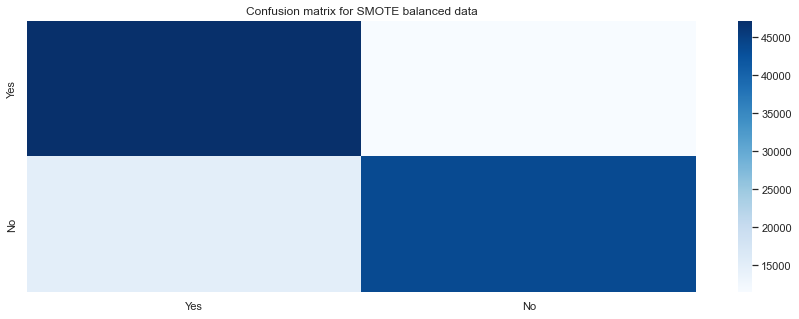

In [20]:
# Report
from sklearn.metrics import classification_report
target_names = ['Heart Disease', 'No Heart Disease']
print('Imbalanced data Report:')
print(classification_report(y_test, lr_pred, target_names=target_names))
print('***********************************************************')
print('Balanced data Report after undersampling:')
print(classification_report(uy_test, lr_pred_b, target_names=target_names))
print('***********************************************************')
print('Balanced data Report after SMOTE:')
print(classification_report(y_test_res, lr_pred_bs, target_names=target_names))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_res, lr_pred_bs)
hm = sns.heatmap(cm, cmap='Blues')
hm.set_title('Confusion matrix for SMOTE balanced data')
hm.set(xticklabels= ['Yes', 'No'], yticklabels = ['Yes', 'No'])

# 2. Random Forrest Classifier

# 2.1 Implementing on Imalanced data

In [16]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 11, random_state = 1)
RFC.fit(X_train,y_train)

#Predictions
y_pred = RFC.predict(X_test)

NameError: name 'X_train' is not defined

# 2.2 Implementing Random Forest Classifier on Balanced Data

In [15]:
# Model for Undersampling data
from sklearn.ensemble import RandomForestClassifier
uRFC = RandomForestClassifier(n_estimators = 13, max_depth=8,random_state = 1)
uRFC.fit(ux_train,uy_train)

#Predictions
uy_pred = uRFC.predict(ux_test)

# Model for SMOTE balanced data
from sklearn.ensemble import RandomForestClassifier
sm_rf = RandomForestClassifier(n_estimators = 13, max_depth=8,random_state = 1)
sm_rf.fit(X_train_res,y_train_res)

sm_pred = sm_rf.predict(X_test_res)

NameError: name 'ux_train' is not defined

# 2.3 Report and Comparision For Random Forrest Classifier

In [23]:
# Report
from sklearn.metrics import classification_report
target_names = ['Heart Disease', 'No Heart Disease']
print('Imbalanced data Report:')
print(classification_report(y_test, y_pred, target_names=target_names))
print('***********************************************************')
print('Balanced data Report after undersampling:')
print(classification_report(uy_test, uy_pred, target_names=target_names))
print('***********************************************************')
print('Balanced data Report after SMOTE:')
print(classification_report(y_test_res, sm_pred, target_names=target_names))

Imbalanced data Report:
                  precision    recall  f1-score   support

   Heart Disease       0.33      0.16      0.21      5385
No Heart Disease       0.93      0.97      0.95     58574

        accuracy                           0.90     63959
       macro avg       0.63      0.56      0.58     63959
    weighted avg       0.88      0.90      0.89     63959

***********************************************************
Balanced data Report after undersampling:
                  precision    recall  f1-score   support

   Heart Disease       0.74      0.81      0.77      5459
No Heart Disease       0.79      0.71      0.75      5491

        accuracy                           0.76     10950
       macro avg       0.77      0.76      0.76     10950
    weighted avg       0.77      0.76      0.76     10950

***********************************************************
Balanced data Report after SMOTE:
                  precision    recall  f1-score   support

   Heart Disease   

[[Text(0.5, 0, 'Yes'), Text(1.5, 0, 'No')],
 [Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]]

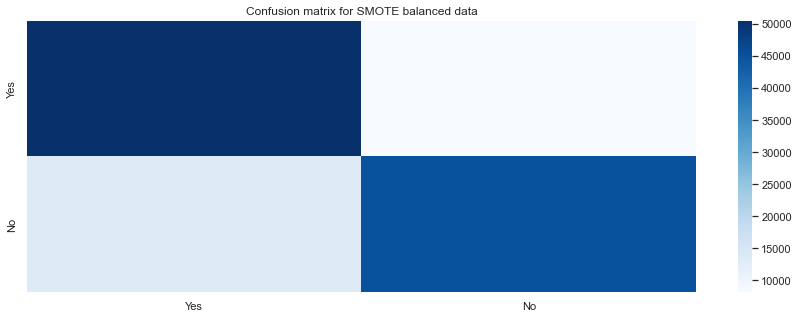

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_res, sm_pred)
hm = sns.heatmap(cm, cmap='Blues')
hm.set_title('Confusion matrix for SMOTE balanced data')
hm.set(xticklabels= ['Yes', 'No'], yticklabels = ['Yes', 'No'])

# 3. XGBoost Classifier 

# 3.1 Implementation on Imbalanced Data

In [37]:
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',2
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
xgbc.fit(X_train, y_train)
xgb_pred = xgbc.predict(X_test)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2419828241.py, line 2)

# 3.2 XGBoost Classifier on Balanced Data

In [26]:
# For random undersampled data
xgbc_u = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
xgbc_u.fit(ux_train, uy_train)
xgbu_pred = xgbc_u.predict(ux_test)

# For SMOTE Balanced data
xgbc_s = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
xgbc_s.fit(X_train_res,y_train_res)
xgbs_pred = xgbc_s.predict(X_test_res)


# 3.3 Report and Comparision For XGBoost Classifier

In [27]:
print('Imbalanced data Report:')
print(classification_report(y_test, xgb_pred,target_names=target_names))
print('***********************************************************')
print('Balanced data Report after undersampling:')
print(classification_report(uy_test, xgbu_pred,target_names=target_names))
print('***********************************************************')
print('Balanced data Report after SMOTE:')
print(classification_report(y_test_res, xgbs_pred, target_names=target_names))

Imbalanced data Report:
                  precision    recall  f1-score   support

   Heart Disease       0.51      0.10      0.17      5385
No Heart Disease       0.92      0.99      0.96     58574

        accuracy                           0.92     63959
       macro avg       0.72      0.54      0.56     63959
    weighted avg       0.89      0.92      0.89     63959

***********************************************************
Balanced data Report after undersampling:
                  precision    recall  f1-score   support

   Heart Disease       0.75      0.79      0.77      5459
No Heart Disease       0.78      0.74      0.76      5491

        accuracy                           0.77     10950
       macro avg       0.77      0.77      0.77     10950
    weighted avg       0.77      0.77      0.77     10950

***********************************************************
Balanced data Report after SMOTE:
                  precision    recall  f1-score   support

   Heart Disease   

[[Text(0.5, 0, 'Yes'), Text(1.5, 0, 'No')],
 [Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]]

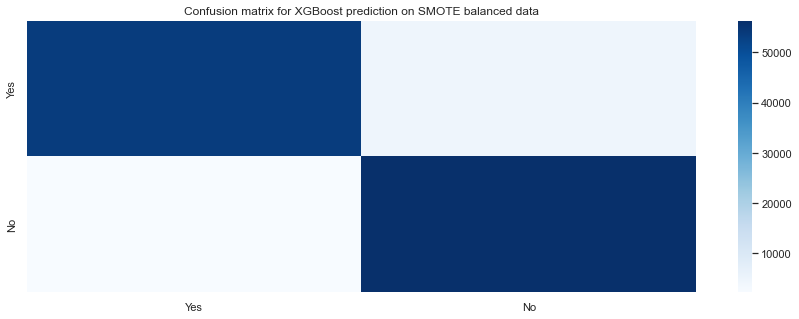

In [28]:
cmxgb = confusion_matrix(y_test_res, xgbs_pred)
hmxgb = sns.heatmap(cmxgb, cmap='Blues')
hmxgb.set_title('Confusion matrix for XGBoost prediction on SMOTE balanced data')
hmxgb.set(xticklabels= ['Yes', 'No'], yticklabels = ['Yes', 'No'])

# Overall Results on Original Test Data

In [39]:
lr_pred_t = regg_bs.predict(X_test)
print(classification_report(y_test, lr_pred_t, target_names=target_names))

                  precision    recall  f1-score   support

   Heart Disease       0.22      0.79      0.35      5385
No Heart Disease       0.97      0.75      0.84     58574

        accuracy                           0.75     63959
       macro avg       0.60      0.77      0.60     63959
    weighted avg       0.91      0.75      0.80     63959



In [31]:
rfc_pred_t = sm_rf.predict(X_test)
print(classification_report(y_test, rfc_pred_t, target_names=target_names))

                  precision    recall  f1-score   support

   Heart Disease       0.23      0.72      0.34      5385
No Heart Disease       0.97      0.77      0.86     58574

        accuracy                           0.77     63959
       macro avg       0.60      0.75      0.60     63959
    weighted avg       0.91      0.77      0.82     63959



In [29]:
xgbs_pred_t = xgbc_s.predict(X_test)
print(classification_report(y_test, xgbs_pred_t, target_names=target_names))

                  precision    recall  f1-score   support

   Heart Disease       0.35      0.22      0.27      5385
No Heart Disease       0.93      0.96      0.95     58574

        accuracy                           0.90     63959
       macro avg       0.64      0.59      0.61     63959
    weighted avg       0.88      0.90      0.89     63959

